In [1]:
##demo
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
from PIL import Image
import sys
sys.setrecursionlimit(200000)

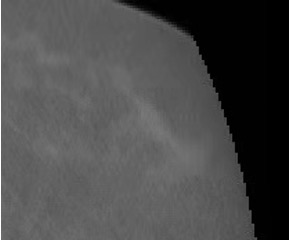

In [11]:
im = Image.open('P1S1.jpeg')
(r,g,b) = im.split()
im = b
thresh = 120
thresh_low = 105
im

In [7]:
w,h = im.size
print([w,h])

[290, 240]


In [8]:
#mask--iterate from pixel to pixel
ttttt=np.zeros((290,240))

In [9]:
blobs = im.point(lambda x: 254 if x == 255 else x)
pixels = blobs.load()
def flood2(x,y,w,h,pixels,ttttt):
    if 0<=x<w and 0<=y<h:
        #print(x)
        #print(y)
        if pixels[x,y]>=thresh:
            pixels[x,y]=128
            ttttt[x,y]=1

            if x>0 and pixels[x-1,y]>=thresh_low and ttttt[x-1,y]==0:
                pixels[x-1,y]=128
                ttttt[x-1,y]=1
                flood2(x-1,y,w,h,pixels,ttttt)
 
            if x<w-1 and pixels[x+1,y]>=thresh_low and ttttt[x+1,y]==0:
                pixels[x+1,y]=128
                ttttt[x+1,y]=1
                flood2(x+1,y,w,h,pixels,ttttt)
 
            if y>0 and pixels[x,y-1]>=thresh_low and ttttt[x,y-1]==0:
                pixels[x,y-1]=128
                ttttt[x,y-1]=1
                flood2(x,y-1,w,h,pixels,ttttt)
 
            if y<h-1 and pixels[x,y+1]>=thresh_low and ttttt[x,y+1]==0:
                pixels[x,y+1]=128
                ttttt[x,y+1]=1
                flood2(x,y+1,w,h,pixels,ttttt)    
 
        else:
            return
    else:
        return



In [10]:
count=0
for i in range(0,w):
    for j in range(0,h):
        if pixels[i,j]>=thresh and ttttt[i,j]==0:
            flood2(i,j,w,h,pixels,ttttt)
            count+=1
        
count

3

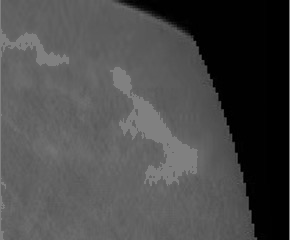

In [12]:
blobs #after adjusting the threshold

In [13]:
#generate barplots
noninvasive = np.array([7872900., 1354680., 7243900., 2936200., 5872920., 6544800.,
       6413000.])
invasive = np.array([ 3034500.,  5009040.,  8804400.,  7060200.,  9078480.,  8190000.,
       12869960.,  4672500.,  5894700.])

import matplotlib.pyplot as plt
noninvasive_mean = np.mean(noninvasive)
invasive_mean = np.mean(invasive)

noninvasive_std = np.std(noninvasive)
invasive_std = np.std(invasive)

tumortype = ['Benign', 'Metastatic']
x_pos = np.arange(len(tumortype))
CTEs = [noninvasive_mean, invasive_mean]
error = [noninvasive_std,invasive_std]

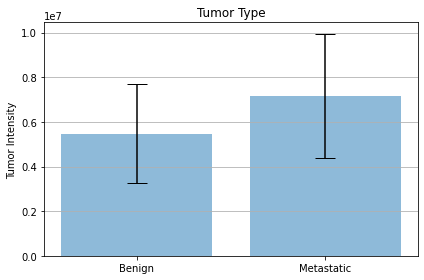

Ttest_indResult(statistic=-1.2499760178484527, pvalue=0.2317999980631609)

In [14]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Tumor Intensity')
ax.set_xticks(x_pos)
ax.set_xticklabels(tumortype)
ax.set_title('Tumor Type')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('intensity_bar_plot_with_error_bars.png')
plt.show()

from scipy import stats as st
st.ttest_ind(noninvasive,invasive)